## KNN Classification Activity: Tune k & Scale Features

This hands-on activity uses the Iris dataset (built into scikit-learn)—a classic for classification with 3 flower species based on 4 measurements (sepal/petal length & width). 

In [ ]:
# Step 1: Import libraries and load data
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


# Load Iris dataset (150 samples, 4 features, 3 classes)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
print("Dataset shape:", X.shape)
print("Target classes:", iris.target_names)
print("\nFirst 5 rows:")
print(X.head())


Dataset shape: (150, 4)
Target classes: ['setosa' 'versicolor' 'virginica']

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [10]:
# Step 2: Split data (80/20 train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (120, 4)
Test set: (30, 4)


#### Experiment 1: KNN Without Scaling (Different k values)

k=1: Accuracy = 0.967
k=3: Accuracy = 1.000
k=5: Accuracy = 1.000
k=10: Accuracy = 1.000
k=20: Accuracy = 0.933


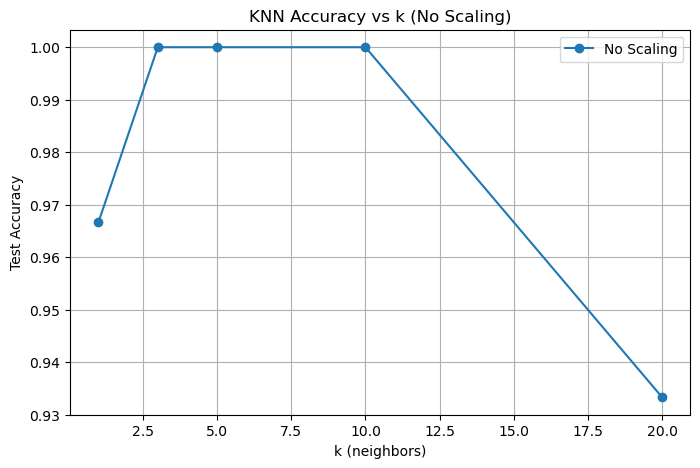

In [11]:
# Test k=1, 3, 5, 10, 20 WITHOUT scaling
k_values = [1, 3, 5, 10, 20]
accuracies_no_scale = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_no_scale.append(acc)
    print(f"k={k}: Accuracy = {acc:.3f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies_no_scale, 'o-', label='No Scaling')
plt.xlabel('k (neighbors)')
plt.ylabel('Test Accuracy')
plt.title('KNN Accuracy vs k (No Scaling)')
plt.grid(True)
plt.legend()
plt.show()


#### Experiment 2: KNN With Scaling (Same k values)

k=1 (scaled): Accuracy = 0.967
k=3 (scaled): Accuracy = 0.933
k=5 (scaled): Accuracy = 0.933
k=10 (scaled): Accuracy = 0.967
k=20 (scaled): Accuracy = 0.967


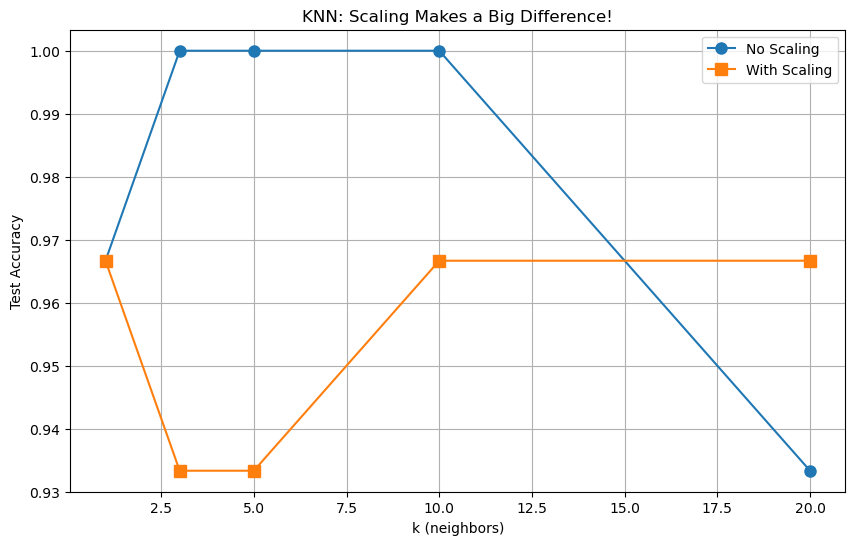

In [12]:
# Scale features to same range (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test same k values WITH scaling
accuracies_scaled = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies_scaled.append(acc)
    print(f"k={k} (scaled): Accuracy = {acc:.3f}")

# Plot both
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_no_scale, 'o-', label='No Scaling', markersize=8)
plt.plot(k_values, accuracies_scaled, 's-', label='With Scaling', markersize=8)
plt.xlabel('k (neighbors)')
plt.ylabel('Test Accuracy')
plt.title('KNN: Scaling Makes a Big Difference!')
plt.legend()
plt.grid(True)
plt.show()


#### Experiment 3: Best Model Deep Dive (k=5, Scaled)

In [13]:
# Train best model (k=5, scaled) and examine predictions
best_k = 5
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

print("Best Model (k=5, scaled):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.3f}")
print("\nDetailed Report:")
print(classification_report(y_test, y_pred_best, target_names=iris.target_names))

# Predict on a new flower (petal-focused, likely versicolor)
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])  # sepal/petal measurements
new_flower_scaled = scaler.transform(new_flower)
prediction = knn_best.predict(new_flower_scaled)
probabilities = knn_best.predict_proba(new_flower_scaled)

print(f"\nNew flower prediction: {iris.target_names[prediction[0]]}")
print("Class probabilities:", dict(zip(iris.target_names, probabilities[0])))


Best Model (k=5, scaled):
Accuracy: 0.933

Detailed Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


New flower prediction: setosa
Class probabilities: {np.str_('setosa'): np.float64(1.0), np.str_('versicolor'): np.float64(0.0), np.str_('virginica'): np.float64(0.0)}


/home/vinny/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Key Takeaways

- Always scale features for distance-based algorithms like KNN.​
- Tune k with validation (small → overfitting, large → underfitting).​
- KNN is interpretable: See exactly which neighbors influenced the prediction.
- Pipeline pattern: StandardScaler → KNeighborsClassifier → fit/predict.

Sources: 

[1](https://www.pinecone.io/learn/k-nearest-neighbor/)
[2](https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/)